<a href="https://colab.research.google.com/github/lanzetti1/Univesp/blob/main/Aula_21_Pr%C3%A1tica_com_Reconhecimento_Facial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COM530 - Visão Computacional

## Semana 7 - Reconhecimento de objetos
## Videoaula 21 - Prática com Reconhecimento Facial

Nesta aula, vamos construir e utilizar uma rede neural profunda pré-treinada para detecção de objetos. Neste caso, detecção/reconhecimento facial. 

Serão seguidos os seguintes passos:

- Importando os pacotes necessários
- Carregando uma imagem pela webcam
- Redimensionado a imagem
- Carregando uma rede pré-treinada
- Utilizando a rede
- Visualizando o resultado

#Importando os pacotes do Python necessários para esta aula

In [ ]:
import imutils
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

#Carregando uma imagem pela webcam

Iniciando a webcam

In [ ]:
def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capturar';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

Clique em "Capturar" para tirar uma foto usando a sua webcam.

In [ ]:
image_file = take_photo()

<IPython.core.display.Javascript object>

#Redimensionando a imagem

Lê, redimensiona e mostra a imagem.

400 300


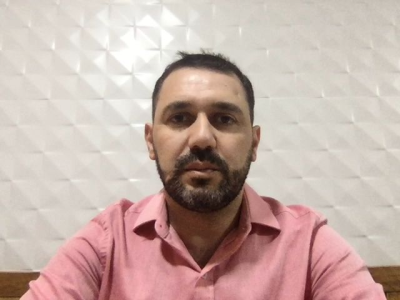

In [ ]:
image = cv2.imread(image_file)

# resize it to have a maximum width of 400 pixels
image = imutils.resize(image, width=400)
(h, w) = image.shape[:2]
print(w,h)
cv2_imshow(image)

#Carregando uma rede pré-treinada

O detector facial de aprendizado profundo do OpenCV é baseado na estrutura SSD (do inglês, *Single Shot Detector*) com uma rede base ResNet. A rede é definida e treinada usando a [estrutura Caffe Deep Learning](https://caffe.berkeleyvision.org/)

Fazendo o *download* do modelo de detecção facial pré-treinado, composto por dois arquivos:

- A definição de rede (deploy.prototxt)
- Os pesos aprendidos (res10_300x300_ssd_iter_140000.caffemodel)

In [ ]:
!wget -N https://raw.githubusercontent.com/opencv/opencv/master/samples/dnn/face_detector/deploy.prototxt
!wget -N https://raw.githubusercontent.com/opencv/opencv_3rdparty/dnn_samples_face_detector_20170830/res10_300x300_ssd_iter_140000.caffemodel

Carregando o modelo de rede de detecção facial pré-treinado.

In [ ]:
`print("[INFO] carregando o modelo...")
prototxt = 'deploy.prototxt'
model = 'res10_300x300_ssd_iter_140000.caffemodel'
net = cv2.dnn.readNetFromCaffe(prototxt, model)

[INFO] carregando o modelo...


#Utilizando a rede

Usando a função [dnn.blobFromImage](https://www.pyimagesearch.com/2017/11/06/deep-learning-opencvs-blobfromimage-works/) para construir um *blob* de entrada redimensionando a imagem para 300 x 300 pixels e, posteriormente, normalizando seus valores.


In [ ]:
# resize it to have a maximum width of 400 pixels
image = imutils.resize(image, width=400)
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, (300, 300), (104.0, 177.0, 123.0))

Passe o *blob* pela rede neural e obtenha as detecções e previsões.

In [ ]:
print("[INFO] computando as detecções de objetos...")
net.setInput(blob)
detections = net.forward()

[INFO] computando as detecções de objetos...


Procurando por detecções e desenhando caixas ao redor dos rostos detectados.

In [ ]:
for i in range(0, detections.shape[2]):

	# extract the confidence (i.e., probability) associated with the prediction
	confidence = detections[0, 0, i, 2]

	# filter out weak detections by ensuring the `confidence` is
	# greater than the minimum confidence threshold
	if confidence > 0.5:
		# compute the (x, y)-coordinates of the bounding box for the object
		box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
		(startX, startY, endX, endY) = box.astype("int")
		# draw the bounding box of the face along with the associated probability
		text = "{:.2f}%".format(confidence * 100)
		y = startY - 10 if startY - 10 > 10 else startY + 10
		cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2)
		cv2.putText(image, text, (startX, y),
			cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)

#Visualizando o resultado

Visualizando a imagem resultante.

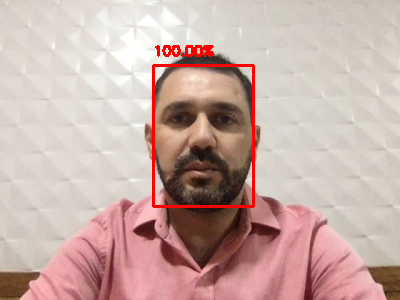

In [ ]:
cv2_imshow(image)

#Agradecimento

Aula prática baseada no material disponibilizado em:

https://colab.research.google.com/github/dortmans/ml_notebooks/blob/master/face_detection.ipynb